## Import stuff

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import layers
import shutil
import random
from PIL import Image
import numpy as np
import logging
from sklearn.metrics import mean_squared_error
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


from tensorflow.python.client import device_lib
device_lib.list_local_devices() 


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5801622847028600280]

## Load training data from csv


In [2]:
csv = pd.read_csv("train.csv")

Y = csv["y"].tolist()
# load columns x1 to x10 as an array of vectors
X = np.array(csv[["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"]].values)

X = np.array(X,  dtype=float)
Y = np.array(Y,  dtype=float)

X = tf.cast(X, tf.float32)
Y = tf.cast(Y, tf.float32)

#print(X.shape)
# random.shuffle(image_ids)
# random.shuffle(diagnostics)

## Create the model and compile it, with loss and optimizer functions

In [35]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=20, input_shape=[10]),
  tf.keras.layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1), metrics=['mean_squared_error'])

## Train the model

In [36]:
# BATCH_SIZE = 32
# X = X.cache().repeat().shuffle(X.shape[0]).batch(BATCH_SIZE)
# Y = Y.cache().batch(BATCH_SIZE)

In [37]:
history = model.fit(X, Y, epochs=100) # , verbose=False
print("Finished training the model")

Epoch 1/100
313/313 [==============================] - 0s 464us/step - loss: 26651.0996 - mean_squared_error: 26651.0996
Epoch 2/100
313/313 [==============================] - 0s 502us/step - loss: 116.9948 - mean_squared_error: 116.9948
Epoch 3/100
313/313 [==============================] - 0s 438us/step - loss: 1490.5323 - mean_squared_error: 1490.5323
Epoch 4/100
313/313 [==============================] - 0s 470us/step - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 5/100
313/313 [==============================] - 0s 419us/step - loss: 1.8542e-06 - mean_squared_error: 1.8542e-06
Epoch 6/100
313/313 [==============================] - 0s 422us/step - loss: 1.2574e-04 - mean_squared_error: 1.2574e-04
Epoch 7/100
313/313 [==============================] - 0s 416us/step - loss: 536.3163 - mean_squared_error: 536.3163
Epoch 8/100
313/313 [==============================] - 0s 524us/step - loss: 14.8473 - mean_squared_error: 14.8473
Epoch 9/100
313/313 [==============================] - 0

In [38]:
pred = model.predict(X)

## Display training statistics

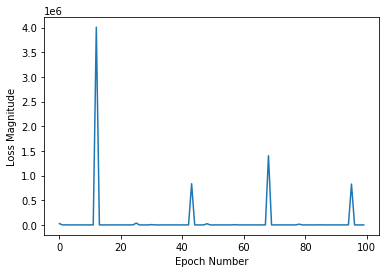

In [39]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Use the model to predict values

In [40]:
print(model.predict([[1764.052345967664,400.1572083672233,978.7379841057392,2240.8931992014577,1867.5579901499675,-977.277879876411,950.0884175255894,-151.3572082976979,-103.21885179355785,410.59850193837235]]))

[[738.7428]]


## Calc accuracy

In [41]:
RMSE = mean_squared_error(Y, pred)**0.5

print("RMSE: ", RMSE)

RMSE:  0.4648075891101706


# Export results

In [43]:
csv_test = pd.read_csv("test.csv")

id = np.array(csv_test["Id"].tolist())
X_test = np.array(csv_test[["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"]].values)

Y = model.predict(X_test).reshape(-1)

print(Y.shape)
print(id.shape)

# create new dataframe with columns Id and y
df = pd.DataFrame({"Id": id, "y": Y})
# write to csv
df.to_csv("submission.csv", index=False)

(2000,)
(2000,)
